## Cloud Coverage Determination event - Cognizance IIT Roorkee tech fest


### Problem Statement: 
The challenge aims to forecast the cloud coverage percentage of open sky
in 4 intervals of 30, 60, 90, and 120 minutes, from a historical window of 6
hours. Cloud coverage is dependent on various parameters like wind speed,
humidity, temperature, and other weather-related parameters. In this
challenge, we have provided sky camera images along with weather data to
forecast cloud coverage.

## Team Members
### Name: Rahul Lalwani, Harsh Chouksey, Akshada Telang, Abi Pateriya

### Importing All necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pickle
from collections import Counter
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import datetime

Directory View

In [2]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is D812-1956

 Directory of C:\Code Playground\Cognizance iit rorkee

25-03-2023  10:02    <DIR>          .
17-03-2023  02:22    <DIR>          ..
17-03-2023  12:32                88 .gitignore
12-03-2023  20:39    <DIR>          .ipynb_checkpoints
12-03-2023  20:39                23 .jovianrc
12-03-2023  20:30    <DIR>          CCD DATA SET z-1
12-03-2023  20:31    <DIR>          CCD DATA SET z-2
11-03-2023  19:51         4,160,554 CCD_2023 Final.pdf
22-03-2023  19:12         1,459,416 Cloud Coverage Determination .ipynb
17-03-2023  02:42    <DIR>          Cloud_coverage.model
22-03-2023  19:02    <DIR>          Cloud_coverage_optimized.model
16-03-2023  11:47               796 Garbage_image.csv
16-03-2023  11:47           141,402 image_indexes.csv
16-03-2023  12:24     1,878,570,169 IMG_features.pickle
16-03-2023  12:24           501,681 label.pickle
25-03-2023  10:02    <DIR>          test_data
16-03-2023  11:47         1,714,869 Usef

Setting up Variables and searching insides in Dataset

In [3]:
DATASETPATH1="CCD DATA SET z-1"
DATASETPATH2="CCD DATA SET Z-2"
print(len(os.listdir(DATASETPATH1)));print(len(os.listdir(DATASETPATH2)))

304
35


In [4]:
os.listdir(DATASETPATH1)

['0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0108',
 '0109',
 '0110',
 '0111',
 '0112',
 '0113',
 '0114',
 '0115',
 '0116',
 '0117',
 '0118',
 '0119',
 '0120',
 '0121',
 '0122',
 '0123',
 '0124',
 '0125',
 '0126',
 '0127',
 '0128',
 '0129',
 '0130',
 '0131',
 '0201',
 '0202',
 '0203',
 '0204',
 '0205',
 '0206',
 '0207',
 '0208',
 '0209',
 '0210',
 '0211',
 '0212',
 '0214',
 '0215',
 '0216',
 '0217',
 '0218',
 '0219',
 '0220',
 '0221',
 '0222',
 '0223',
 '0224',
 '0225',
 '0227',
 '0228',
 '0229',
 '0302',
 '0303',
 '0304',
 '0305',
 '0306',
 '0307',
 '0308',
 '0309',
 '0310',
 '0311',
 '0312',
 '0315',
 '0318',
 '0319',
 '0321',
 '0322',
 '0325',
 '0326',
 '0327',
 '0328',
 '0329',
 '0330',
 '0331',
 '0401',
 '0402',
 '0403',
 '0406',
 '0407',
 '0408',
 '0409',
 '0410',
 '0411',
 '0412',
 '0415',
 '0417',
 '0418',
 '0419',
 '0420',
 '0421',
 '0422',
 '0424',
 '0425',
 '0426',
 '0427',
 '0429',
 '0430',
 '0501',
 '0502',
 '0503',
 '0504',
 '0506',
 '0507',
 '0508',
 

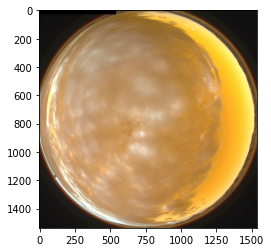

(1536, 1536, 3)


In [5]:
for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    for IMG in os.listdir(IMGPATH):
        img=cv.imread(os.path.join(IMGPATH,IMG),cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        print(img.shape)
        break
    break
    

### PreProcessing

In [6]:
Dataset=pd.read_csv("CCD DATA SET z-1/train.csv", low_memory=False)

In [7]:
Dataset.shape

(527040, 17)

In [8]:
Dataset.dropna(inplace=True)

In [9]:
Dataset

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-Nov,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,82.60,0.0,0.00,0.0,812.966,0.0,2.805,0.0,0.0
498236,12-Nov,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,82.10,0.0,0.70,292.0,812.967,0.0,2.800,0.0,0.0
498237,12-Nov,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,82.00,0.0,0.00,0.0,812.956,0.0,2.842,0.0,0.0
498238,12-Nov,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,82.30,0.0,0.00,0.0,812.921,0.0,2.842,0.0,0.0


In [10]:
for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    Arr=[]
    for IMG in os.listdir(IMGPATH):
        Arr.append(IMG)
    break
Arr.sort()
len(Arr)

55

In [11]:
Dataset.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [12]:
# np.where(Dataset['Total Cloud Cover [%]']==-1)
Counter(Dataset['Total Cloud Cover [%]'])

Counter({0.0: 248275,
         6.0: 4026,
         8.0: 5331,
         10.0: 6072,
         13.0: 5623,
         15.0: 4633,
         19.0: 3376,
         21.0: 2715,
         22.0: 2457,
         23.0: 2383,
         24.0: 2284,
         25.0: 2085,
         29.0: 1592,
         34.0: 1322,
         38.0: 1182,
         42.0: 1153,
         40.0: 1192,
         43.0: 1176,
         41.0: 1180,
         37.0: 1176,
         35.0: 1210,
         30.0: 1485,
         26.0: 1916,
         20.0: 3027,
         17.0: 3963,
         16.0: 4266,
         14.0: 5095,
         18.0: 3655,
         11.0: 6140,
         7.0: 5257,
         12.0: 6271,
         27.0: 1811,
         28.0: 1697,
         9.0: 5863,
         39.0: 1155,
         46.0: 1022,
         52.0: 1081,
         57.0: 1029,
         59.0: 1027,
         64.0: 1064,
         66.0: 1024,
         69.0: 1155,
         71.0: 1157,
         73.0: 1175,
         76.0: 1321,
         77.0: 1379,
         78.0: 1347,
         81.0: 1

In [13]:
np.where(Dataset['DATE (MM/DD)']=='01-Jan')

(array([   0,    1,    2, ..., 1434, 1435, 1436], dtype=int64),)

<AxesSubplot:>

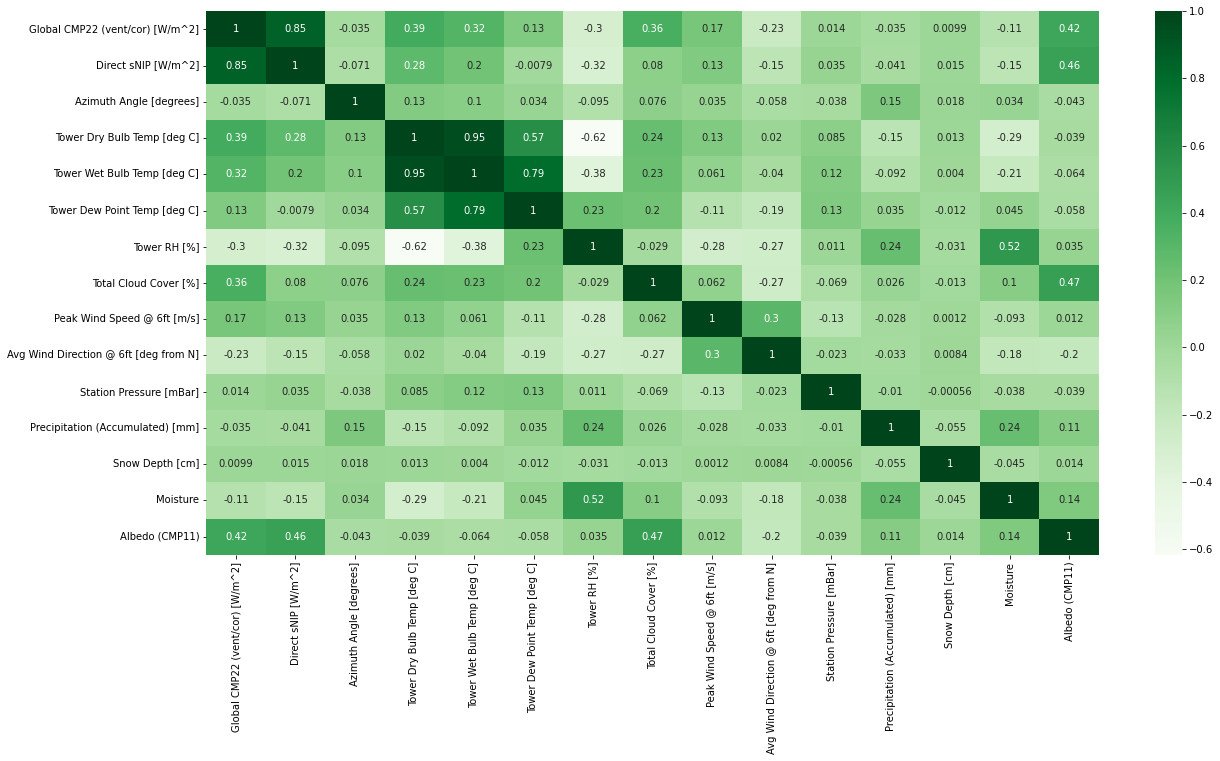

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(Dataset.iloc[:,2:].corr(),annot=True,cmap="Greens")

### we will take the highly correlated variable with target variable for further training data

In [15]:
DsOptimized=Dataset.drop(['Tower RH [%]','Avg Wind Direction @ 6ft [deg from N]','Station Pressure [mBar]','Snow Depth [cm]'],axis=1)

In [16]:
DsOptimized

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,0.0,9.95,0.0,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,0.0,8.20,0.0,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,0.0,6.70,0.0,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,0.0,7.70,0.0,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,0.0,7.20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-Nov,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,0.0,0.00,0.0,0.0,0.0
498236,12-Nov,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,0.0,0.70,0.0,0.0,0.0
498237,12-Nov,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,0.0,0.00,0.0,0.0,0.0
498238,12-Nov,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,0.0,0.00,0.0,0.0,0.0


#### Making the Date and time part of the dataset in correct format
So that it can be matched to Images and img data

In [17]:

for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,"0102")
    Date_arr=[]
    time_arr=[]
    for IMG in os.listdir(IMGPATH):
        filename=IMG
        date_str = filename[:4] # '0101'
        time_str = filename[4:] # '140000'
        time_str=time_str.split('.')[0]
        timestamp_str = f'2022{date_str[:2]}{date_str[2:]}{time_str}'
        timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d%H%M%S')
        new_date = timestamp.strftime('%m-%d %H:%M')
        Date_arr.append(new_date.split(" ")[0])
        time_arr.append(new_date.split(" ")[1])

    break
    

In [18]:
Date_part=DsOptimized['DATE (MM/DD)']


In [19]:
s="jan-01"
month_str,day_str=s.split("-")
print(month_str,day_str)
s=s.lower()
pattern=r"(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)-\d{2}"
if re.match(pattern,s):
    print("hello")

jan 01
hello


In [20]:
def convert_correct_format(Date):
    Date=Date.lower()
    pattern=r"(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)-\d{2}"
    if re.match(pattern,Date):
        month_str,day_str=Date.split("-")

        # Convert month string to month number
        month_num = datetime.datetime.strptime(month_str, '%b').month

        # Create datetime object with year set to arbitrary value (e.g. 2000)
        dt = datetime.datetime(2000, month_num, int(day_str))

        # Format datetime object to desired output string
        output_str = dt.strftime('%d-%b')
        return output_str
    return Date

In [21]:
Date_part=list(map(convert_correct_format,Date_part))

In [22]:
Counter(list(map(lambda x:True if re.match(pattern,x.lower()) else False,Date_part)))

Counter({False: 480931})

In [23]:
def numerial_date(Date):
    Date=Date.lower()
    if "jan" in Date:
        return Date.replace("jan","01")
    elif "feb" in Date:
        return Date.replace("feb","02")
    elif "mar" in Date:
        return Date.replace("mar","03")
    elif "apr" in Date:
        return Date.replace("apr","04")
    elif "may" in Date:
        return Date.replace("may","05")
    elif "jun" in Date:
        return Date.replace("jun","06")
    elif "jul" in Date:
        return Date.replace("jul","07")
    elif "aug" in Date:
        return Date.replace("aug","08")
    elif "sep" in Date:
        return Date.replace("sep","09")
    elif "oct" in Date:
        return Date.replace("oct","10")
    elif "nov" in Date:
        return Date.replace("nov","11")
    elif "dec" in Date:
        return Date.replace("dec","12")
    else:
        return Date

In [24]:
Date_part[-1]

'12-nov'

In [25]:
Date_part=list(map(numerial_date,Date_part))
# with open('try.csv','w') as f:
#     f.writelines(Date_part)

#### timeseries data in now corrected time to find the relevent data from whole time series data

In [26]:
DsOptimized['DATE (MM/DD)']=Date_part

In [27]:
print(Date_arr[0],time_arr[0])

01-02 07:40


In [28]:
np.where((DsOptimized["DATE (MM/DD)"]==Date_arr[2])&(DsOptimized["MST"]==time_arr[2]))[0]

array([1917], dtype=int64)

In [29]:
DsOptimized.iloc[480,:]

DATE (MM/DD)                            01-01
MST                                     08:00
Global CMP22 (vent/cor) [W/m^2]       28.8356
Direct sNIP [W/m^2]                    0.8259
Azimuth Angle [degrees]             126.02976
Tower Dry Bulb Temp [deg C]              8.66
Tower Wet Bulb Temp [deg C]              2.48
Tower Dew Point Temp [deg C]            -5.12
Total Cloud Cover [%]                    25.0
Peak Wind Speed @ 6ft [m/s]               5.7
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.2118
Name: 480, dtype: object

In [30]:
Date_arr=[]
time_arr=[]
IMG_filename=[]
for IMGDIR in os.listdir(DATASETPATH1)[:-1]: #to avoid train.csv
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    for IMG in os.listdir(IMGPATH):
        filename=IMG
        if len(IMG)<12:
            continue
        IMG_filename.append(os.path.join(IMGPATH,filename))
        date_str = filename[:4] # '0101'
        time_str = filename[4:] # '140000.jpg'
        time_str=time_str.split('.')[0] # '140000'
        timestamp_str = f'2020{date_str[:2]}{date_str[2:]}{time_str}'
        timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d%H%M%S')
        new_date = timestamp.strftime('%d-%m %H:%M')
        Date_arr.append(new_date.split(" ")[0])
        time_arr.append(new_date.split(" ")[1])

In [31]:
print(len(Date_arr)); print(len(time_arr))

21017
21017


In [32]:
DsOptimized

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
0,01-01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,0.0,9.95,0.0,0.0,0.0
1,01-01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,0.0,8.20,0.0,0.0,0.0
2,01-01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,0.0,6.70,0.0,0.0,0.0
3,01-01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,0.0,7.70,0.0,0.0,0.0
4,01-01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,0.0,7.20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-11,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,0.0,0.00,0.0,0.0,0.0
498236,12-11,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,0.0,0.70,0.0,0.0,0.0
498237,12-11,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,0.0,0.00,0.0,0.0,0.0
498238,12-11,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,0.0,0.00,0.0,0.0,0.0


In [33]:
#will take some time to execute
indexes=[]
garbage=[]
for row in range(len(Date_arr)):
#     print(Date_arr[row],time_arr[row])
    index=np.where((DsOptimized["DATE (MM/DD)"]==Date_arr[row])&(DsOptimized["MST"]==time_arr[row]))
    if np.size(index[0])==0:
        garbage.append(row)
        continue
#     print(index)
    indexes.append(index)
len(indexes)

KeyboardInterrupt: 

In [ ]:
np.size(indexes[1][0])

In [ ]:
image_indexes = [index[0][0] for index in indexes if index[0].any()]

In [39]:
print(len(image_indexes))
print(len(garbage))

20873
144


In [40]:
UsefulData=DsOptimized.iloc[image_indexes]


In [42]:
import csv
UsefulData.to_csv("UsefulData_Dsoptimized.csv",index=False)
with open('image_indexes.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(image_indexes)
with open('Garbage_image.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(garbage)

In [43]:
len(IMG_filename)

21017

In [44]:
for index in garbage:
    del IMG_filename[index]

In [45]:
len(IMG_filename)

20873

In [46]:
UsefulData.iloc[11,:]

DATE (MM/DD)                            01-01
MST                                     09:30
Global CMP22 (vent/cor) [W/m^2]       327.643
Direct sNIP [W/m^2]                   882.424
Azimuth Angle [degrees]             142.99879
Tower Dry Bulb Temp [deg C]             10.53
Tower Wet Bulb Temp [deg C]             3.683
Tower Dew Point Temp [deg C]           -4.217
Total Cloud Cover [%]                    13.0
Peak Wind Speed @ 6ft [m/s]              4.95
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.2576
Name: 570, dtype: object

In [47]:
UsefulData.iloc[0,:]

DATE (MM/DD)                            01-01
MST                                     07:40
Global CMP22 (vent/cor) [W/m^2]       8.53993
Direct sNIP [W/m^2]                    1.0781
Azimuth Angle [degrees]             122.69154
Tower Dry Bulb Temp [deg C]             7.202
Tower Wet Bulb Temp [deg C]             1.503
Tower Dew Point Temp [deg C]           -5.597
Total Cloud Cover [%]                     0.0
Peak Wind Speed @ 6ft [m/s]               2.2
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.1883
Name: 460, dtype: object

#### Now time series data is prepared lets start preprocessing on image data

30


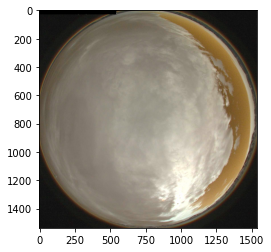

31


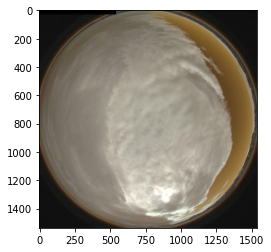

32


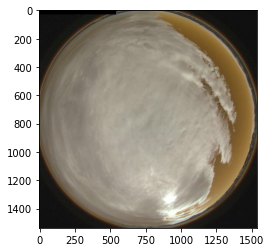

33


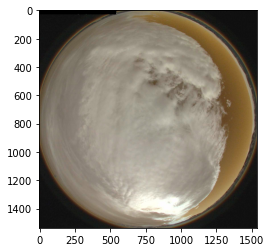

34


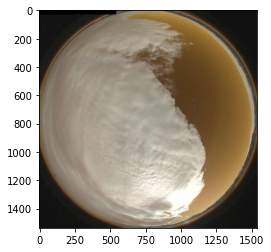

35


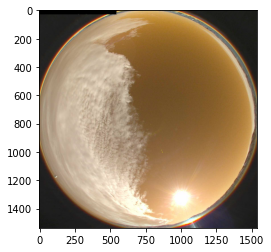

36


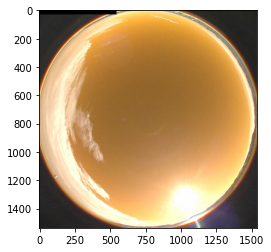

37


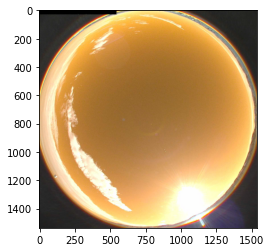

38


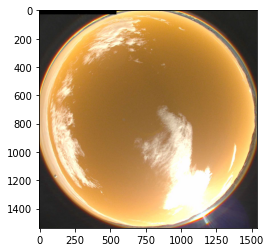

39


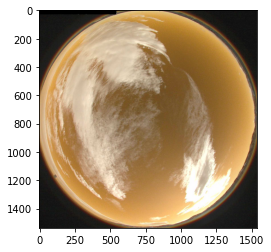

In [50]:
import cv2
for IMG in IMG_filename[30:40]:
    print(IMG_filename.index(IMG))
    img = cv2.imread(IMG)
    plt.imshow(img)
    plt.show()

In [68]:
#adaptive thresholding technique
# %time x=2+2
# take time to convert all image about 10 min 
IMG_features=[]
IMGSIZE=300
import cv2
for IMG in IMG_filename:
    img = cv2.imread(IMG)
    img=cv2.resize(img,(IMGSIZE,IMGSIZE))
    
    #Creating mask 
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = min(center)
    cv2.circle(mask, center, radius, (255, 255, 255), -1, cv2.LINE_AA)

    # apply the mask to the image
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # convert the image to grayscale
    gray_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

    # apply adaptive thresholding
    thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    IMG_features.append(thresh_img)


In [70]:
UsefulData.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Precipitation (Accumulated) [mm]',
       'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [93]:
X_features=UsefulData.drop(["Total Cloud Cover [%]",'DATE (MM/DD)', 'MST'],axis=1).values
label=UsefulData['Total Cloud Cover [%]'].values

In [94]:
#(1536, 1536, 3)
print(X_features.shape);
print(type(X_features))
label.shape
# X_features.shape

(20873, 10)
<class 'numpy.ndarray'>


(20873,)

In [96]:
X_features = np.reshape(X_features, (X_features.shape[0], X_features.shape[1], 1))

In [97]:
X_features.shape

(20873, 10, 1)

In [74]:
IMG_features=np.array(IMG_features).reshape(-1,300,300,1)

In [103]:
Counter(label)

Counter({0.0: 1770,
         13.0: 466,
         25.0: 168,
         37.0: 102,
         15.0: 392,
         18.0: 333,
         10.0: 499,
         14.0: 410,
         28.0: 135,
         12.0: 533,
         59.0: 95,
         81.0: 124,
         92.0: 183,
         95.0: 429,
         96.0: 561,
         97.0: 709,
         91.0: 195,
         89.0: 158,
         90.0: 187,
         82.0: 116,
         48.0: 76,
         43.0: 91,
         19.0: 308,
         33.0: 118,
         65.0: 92,
         34.0: 105,
         16.0: 346,
         5.0: 303,
         4.0: 207,
         7.0: 423,
         2.0: 91,
         1.0: 49,
         74.0: 118,
         85.0: 144,
         84.0: 135,
         86.0: 134,
         80.0: 121,
         75.0: 109,
         63.0: 94,
         69.0: 90,
         78.0: 113,
         66.0: 77,
         76.0: 88,
         54.0: 84,
         49.0: 104,
         52.0: 88,
         62.0: 97,
         77.0: 127,
         79.0: 102,
         71.0: 93,
         72.0: 102,

In [83]:
IMG_features.shape

(20873, 300, 300, 1)

#### Saving data so that we don't have to run all time taking functions again

In [99]:
pickle_out=open("IMG_features.pickle","wb")
pickle.dump(IMG_features,pickle_out)
pickle_out.close()

pickle_out=open("X_features.pickle","wb")
pickle.dump(X_features,pickle_out)
pickle_out.close()

pickle_out=open("label.pickle","wb")
pickle.dump(label,pickle_out)
pickle_out.close()

## Hybrid model for both timeseries and Image Data 

In [50]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, LSTM, concatenate

# define input shapes for image and time-series data
img_input_shape = (300, 300, 1) # assuming image size is 300x300 and it has 1 color channel
ts_input_shape = (10,1) # assuming time-series data has 10 time steps and 1 feature

# define image processing layers
img_input = Input(shape=img_input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(img_input)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
flatten1 = Flatten()(conv2)

# define time-series data processing layers
ts_input = Input(shape=ts_input_shape)
lstm1 = LSTM(32, activation='relu')(ts_input)
flatten2 = Flatten()(lstm1)

# concatenate image and time-series data processing layers
concatenated = concatenate([flatten1, flatten2])

# add final classification layer
output = Dense(1, activation='linear')(concatenated)

# define the model with input and output layers
model = Model(inputs=[img_input, ts_input], outputs=output)

# compile the model with appropriate optimizer, loss function and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [51]:
# train the model with image and time-series data

history = model.fit([IMG_features, X_features], label, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
522/522 [==============================] - 1706s 3s/step - loss: 3881795.7500 - mean_absolute_error: 270.9395 - val_loss: 863.7564 - val_mean_absolute_error: 23.8001
Epoch 2/10
522/522 [==============================] - 1699s 3s/step - loss: 634.5070 - mean_absolute_error: 19.0028 - val_loss: 459.8015 - val_mean_absolute_error: 15.5323
Epoch 3/10
522/522 [==============================] - 2031s 4s/step - loss: 439.5879 - mean_absolute_error: 15.5911 - val_loss: 363.0741 - val_mean_absolute_error: 13.8810
Epoch 4/10
522/522 [==============================] - 1822s 3s/step - loss: 374.4724 - mean_absolute_error: 14.3268 - val_loss: 314.6290 - val_mean_absolute_error: 12.5987
Epoch 5/10
522/522 [==============================] - 1642s 3s/step - loss: 335.5610 - mean_absolute_error: 13.5195 - val_loss: 315.6687 - val_mean_absolute_error: 12.7489
Epoch 6/10
522/522 [==============================] - 1648s 3s/step - loss: 304.5470 - mean_absolute_error: 12.8231 - val_loss: 327.733

#### Yah!! Boy, Now our model is trained With Mean Absolute Error of 13.44 which can produce some Good output

In [113]:
model.predict([IMG_features,X_features]) #with 5 epochs

653/653 [==============================] - 566s 866ms/step


array([[  1.8499792],
       [ 35.008926 ],
       [ 46.52544  ],
       ...,
       [-10.291237 ],
       [ -3.5131075],
       [ -4.3888702]], dtype=float32)

In [53]:
model.predict([IMG_features,X_features]) #With 10 epochs

653/653 [==============================] - 485s 741ms/step


array([[ 6.50267  ],
       [20.036243 ],
       [34.267506 ],
       ...,
       [-5.3198247],
       [ 6.233169 ],
       [ 1.9980539]], dtype=float32)

In [114]:
label

array([ 0., 13., 25., ...,  2.,  0.,  0.])

#### Saving model So that we don't have to train model again and again, Since we know who much time Consuming is to train a ML model with that much big data
### Once a Wise man said : " Time is Money " 

In [115]:
model.save("Cloud_coverage.model")

INFO:tensorflow:Assets written to: Cloud_coverage.model\assets


INFO:tensorflow:Assets written to: Cloud_coverage.model\assets


In [54]:
model.save("Cloud_coverage_optimized.model")

INFO:tensorflow:Assets written to: Cloud_coverage_optimized.model\assets


INFO:tensorflow:Assets written to: Cloud_coverage_optimized.model\assets


#### Showing how to load model and Saved Dataset for testing purposes

In [34]:
new_model=load_model("Cloud_coverage.model")

In [55]:
optimized_model=load_model("Cloud_coverage_optimized.model")

In [31]:
pickle_in=open("IMG_features.pickle","rb")
IMG_features=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("X_features.pickle","rb")
X_features=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("label.pickle","rb")
label=pickle.load(pickle_in)
pickle_in.close()

In [52]:
print(IMG_features.shape)
print(X_features.shape)
print(label.shape)

(20873, 300, 300, 1)
(20873, 10, 1)
460        0.0
470       13.0
480       25.0
490       37.0
500       15.0
          ... 
481910    11.0
481920    11.0
481930     2.0
481940     0.0
481950     0.0
Name: Total Cloud Cover [%], Length: 20873, dtype: float64


In [35]:
new_model.predict([IMG_features[10:20],X_features[10:20]])

1/1 [==============================] - 1s 1s/step


array([[64.378525 ],
       [-3.0100138],
       [ 4.344116 ],
       [30.754564 ],
       [51.051777 ],
       [91.60104  ],
       [85.04344  ],
       [85.661896 ],
       [91.615105 ],
       [86.6847   ]], dtype=float32)

In [56]:
optimized_model.predict([IMG_features[10:20],X_features[10:20]])

1/1 [==============================] - 0s 413ms/step


array([[51.54151 ],
       [ 3.734792],
       [13.422433],
       [40.42927 ],
       [64.98766 ],
       [89.23746 ],
       [94.14541 ],
       [90.30529 ],
       [93.39147 ],
       [92.72469 ]], dtype=float32)

In [36]:
label[10:20]

560    12.0
570    13.0
580    18.0
590    59.0
600    81.0
610    92.0
620    95.0
630    95.0
640    96.0
650    97.0
Name: Total Cloud Cover [%], dtype: float64

## Modules

In [37]:
def convert_correct_format(Date):
    Date=Date.lower()
    pattern=r"(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)-\d{2}"
    if re.match(pattern,Date):
        month_str,day_str=Date.split("-")

        # Convert month string to month number
        month_num = datetime.datetime.strptime(month_str, '%b').month

        # Create datetime object with year set to arbitrary value (e.g. 2000)
        dt = datetime.datetime(2000, month_num, int(day_str))

        # Format datetime object to desired output string
        output_str = dt.strftime('%d-%b')
        return output_str
    return Date

In [38]:
def numerial_date(Date):
    Date=Date.lower()
    if "jan" in Date:
        return Date.replace("jan","01")
    elif "feb" in Date:
        return Date.replace("feb","02")
    elif "mar" in Date:
        return Date.replace("mar","03")
    elif "apr" in Date:
        return Date.replace("apr","04")
    elif "may" in Date:
        return Date.replace("may","05")
    elif "jun" in Date:
        return Date.replace("jun","06")
    elif "jul" in Date:
        return Date.replace("jul","07")
    elif "aug" in Date:
        return Date.replace("aug","08")
    elif "sep" in Date:
        return Date.replace("sep","09")
    elif "oct" in Date:
        return Date.replace("oct","10")
    elif "nov" in Date:
        return Date.replace("nov","11")
    elif "dec" in Date:
        return Date.replace("dec","12")
    else:
        return Date

In [173]:
def Read_Dataset_in_correct_DateTime_format(Dataset,listofcolumn2drop=[]):
#     Dataset=pd.read_csv(PATH, low_memory=False)
#     Dataset.dropna(inplace=True)
    DsOptimized=Dataset.drop(listofcolumn2drop,axis=1)
    Date_part=DsOptimized['DATE (MM/DD)']
    Date_part=list(map(convert_correct_format,Date_part))
    Date_part=list(map(numerial_date,Date_part))
    DsOptimized['DATE (MM/DD)']=Date_part
    return DsOptimized;

In [69]:
def Extract_DateTime(PATH):
    Date_arr=[]
    time_arr=[]
    IMG_filename=[]
#     for IMGDIR in os.listdir(PATH)[:-1]: #to avoid train.csv
    for IMGDIR in os.listdir(PATH)[:-2]: #to avoid train.csv
        IMGPATH=os.path.join(PATH,IMGDIR)
        for IMG in os.listdir(IMGPATH):
            filename=IMG
            if len(IMG)<12:
                continue
            IMG_filename.append(os.path.join(IMGPATH,filename))
            date_str = filename[:4] # '0101'
            time_str = filename[4:] # '140000.jpg'
            time_str=time_str.split('.')[0] # '140000'
            timestamp_str = f'2020{date_str[:2]}{date_str[2:]}{time_str}'
            timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d%H%M%S')
            new_date = timestamp.strftime('%d-%m %H:%M')
            Date_arr.append(new_date.split(" ")[0])
            time_arr.append(new_date.split(" ")[1])
    return Date_arr,time_arr,IMG_filename

In [41]:
def Index_UsefulData(Date_arr,time_arr,Dataset):
    indexes=[]
    garbage=[]
    for row in range(len(Date_arr)):
    #     print(Date_arr[row],time_arr[row])
        index=np.where((Dataset["DATE (MM/DD)"]==Date_arr[row])&(Dataset["MST"]==time_arr[row]))
        if np.size(index[0])==0:
            garbage.append(row)
            continue
    #     print(index)
        indexes.append(index)
    image_indexes = [index[0][0] for index in indexes if index[0].any()]
    return image_indexes,garbage

In [42]:
def Delete_image_with_no_index(garbage,IMGfile):
    for index in garbage:
        del IMGfile[index]
    return IMGfile

In [43]:
def Preprocessing_IMGdata(IMG_filename):
    IMG_features=[]
    IMGSIZE=300
    for IMG in IMG_filename:
        img = cv2.imread(IMG)
        img=cv2.resize(img,(IMGSIZE,IMGSIZE))

        #Creating mask 
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        center = (img.shape[1] // 2, img.shape[0] // 2)
        radius = min(center)
        cv2.circle(mask, center, radius, (255, 255, 255), -1, cv2.LINE_AA)

        # apply the mask to the image
        masked_img = cv2.bitwise_and(img, img, mask=mask)

        # convert the image to grayscale
        gray_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

        # apply adaptive thresholding
        thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        IMG_features.append(thresh_img)
    return IMG_features;

In [44]:
def Timeseries_features_labels(Dataset,columns2drop,label_name):
    columns2drop.extend(label)
    X_features=UsefulData.drop(columns2drop,axis=1).values
    label=UsefulData[label_name].values
    return X_features,label

In [119]:
def final_reshape(timeseries_features,IMG_features,IMGsize):
    X_features = np.reshape(timeseries_features, (X_features.shape[0], X_features.shape[1], 1))
    IMG_features=np.array(IMG_features).reshape(-1,IMGsize,IMGsize,1)
    return X_features,IMG_features

## Testing on dataset

In [34]:
TESTPATH="test_data"

In [68]:
os.listdir(TESTPATH)[:-2]

['.ipynb_checkpoints',
 '1201',
 '1202',
 '1203',
 '1204',
 '1205',
 '1206',
 '1207',
 '1208',
 '1209',
 '1210',
 '1211',
 '1212',
 '1213',
 '1214',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1221',
 '1222',
 '1223',
 '1224',
 '1225',
 '1226',
 '1227',
 '1228',
 '1229',
 '1230',
 '1231']

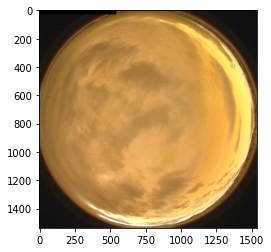

(1536, 1536, 3)


In [36]:
for IMGDIR in os.listdir(TESTPATH):
    IMGPATH=os.path.join(TESTPATH,IMGDIR)
    for IMG in os.listdir(IMGPATH):
        img=cv.imread(os.path.join(IMGPATH,IMG),cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        print(img.shape)
        break
    break

In [49]:
!pip install openpyxl

In [53]:
# DStest=Read_Dataset_in_correct_DateTime_format()
test=pd.read_csv("test_data/test_cogni.csv")

In [54]:
test

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Dec,00:00,-0.922235,0.187928,353.46908,-0.391,-4.704,-14.004,30.55,0.0,3.20,295.1,808.550,0.0,0.179,0.0,0.0
1,01-Dec,00:01,-0.930056,0.171791,354.21306,-0.468,-4.638,-13.238,32.98,0.0,2.20,301.7,808.549,0.0,0.032,0.0,0.0
2,01-Dec,00:02,-0.929266,0.059346,354.95847,-0.749,-4.743,-13.043,34.36,0.0,2.20,286.4,808.515,0.0,0.035,0.0,0.0
3,01-Dec,00:03,-0.925761,0.000000,355.70513,-1.024,-4.960,-13.060,35.10,0.0,2.45,286.9,808.466,0.0,0.061,0.0,0.0
4,01-Dec,00:04,-0.849125,0.000000,356.45286,-1.231,-5.030,-13.130,35.48,0.0,2.70,277.2,808.433,0.0,0.156,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,Dec-31,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,43.61,0.0,0.00,0.0,816.186,0.0,2.899,0.0,0.0
44636,Dec-31,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,43.77,0.0,0.00,0.0,816.185,0.0,2.866,0.0,0.0
44637,Dec-31,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,43.73,0.0,0.00,0.0,816.198,0.0,2.882,0.0,0.0
44638,Dec-31,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,44.17,0.0,0.00,0.0,816.194,0.0,2.805,0.0,0.0


In [55]:
test.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [56]:
DStest=Read_Dataset_in_correct_DateTime_format("test_data/test_cogni.csv",['Tower RH [%]','Avg Wind Direction @ 6ft [deg from N]','Station Pressure [mBar]','Snow Depth [cm]'])

In [57]:
DStest

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
0,01-12,00:00,-0.922235,0.187928,353.46908,-0.391,-4.704,-14.004,0.0,3.20,0.0,0.0,0.0
1,01-12,00:01,-0.930056,0.171791,354.21306,-0.468,-4.638,-13.238,0.0,2.20,0.0,0.0,0.0
2,01-12,00:02,-0.929266,0.059346,354.95847,-0.749,-4.743,-13.043,0.0,2.20,0.0,0.0,0.0
3,01-12,00:03,-0.925761,0.000000,355.70513,-1.024,-4.960,-13.060,0.0,2.45,0.0,0.0,0.0
4,01-12,00:04,-0.849125,0.000000,356.45286,-1.231,-5.030,-13.130,0.0,2.70,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,31-12,23:55,-1.360910,-0.340704,352.62902,-0.469,-3.940,-10.140,0.0,0.00,0.0,0.0,0.0
44636,31-12,23:56,-1.342520,-0.325891,353.41779,-0.499,-3.927,-10.127,0.0,0.00,0.0,0.0,0.0
44637,31-12,23:57,-1.341260,-0.320952,354.20842,-0.522,-3.958,-10.158,0.0,0.00,0.0,0.0,0.0
44638,31-12,23:58,-1.334130,-0.320953,355.00071,-0.558,-3.979,-10.079,0.0,0.00,0.0,0.0,0.0


In [59]:
DStest.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Precipitation (Accumulated) [mm]',
       'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [70]:
Date_arr,time_arr,IMG_filename=Extract_DateTime(TESTPATH)

In [73]:
print(len(Date_arr))
print(len(time_arr))
print(len(IMG_filename))

1719
1719
1719


In [76]:
image_indexes,garbage=Index_UsefulData(Date_arr,time_arr,DStest)

In [78]:
len(image_indexes)

1714

In [81]:
DStest.iloc[image_indexes]

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
430,01-12,07:10,0.509375,0.489604,116.17278,-1.236,-5.483,-15.283,0.0,1.45,0.0,0.0,0.0000
440,01-12,07:20,3.761270,0.281892,117.74153,-0.665,-5.162,-15.362,0.0,2.45,0.0,0.0,0.0000
450,01-12,07:30,12.905600,139.007000,119.33603,-1.007,-5.331,-15.531,0.0,3.45,0.0,0.0,0.0000
460,01-12,07:40,32.653200,360.005000,120.95864,-1.099,-5.349,-15.049,0.0,1.20,0.0,0.0,0.4870
470,01-12,07:50,54.364400,464.075000,122.61168,-0.791,-5.307,-15.607,3.0,0.95,0.0,0.0,0.4190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44160,31-12,16:00,45.669600,-0.237007,232.56356,2.718,-1.533,-8.033,70.0,2.70,0.0,0.0,0.2621
44170,31-12,16:10,29.018200,-0.074066,234.27893,2.524,-1.695,-8.095,43.0,2.20,0.0,0.0,0.2545
44180,31-12,16:20,17.494900,-0.241948,235.95945,2.303,-1.661,-7.561,11.0,2.20,0.0,0.0,0.2455
44190,31-12,16:30,9.664210,-0.222197,237.60716,2.026,-1.643,-7.143,0.0,2.20,0.0,0.0,0.2204


In [82]:
IMG_filename=Delete_image_with_no_index(garbage,IMG_filename)

In [83]:
len(IMG_filename)

1714

In [85]:
import cv2
IMG_features=Preprocessing_IMGdata(IMG_filename)

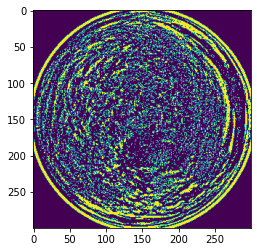

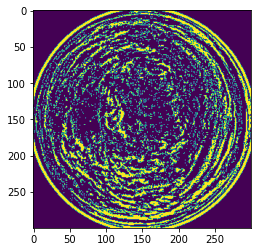

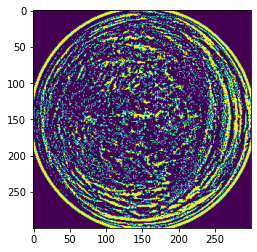

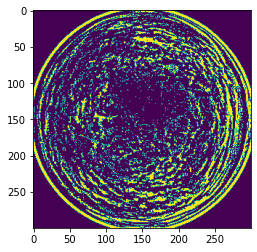

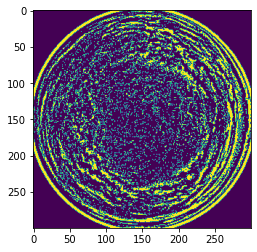

In [101]:
for img in IMG_features[:5]:
    plt.imshow(img)
    plt.show()

In [111]:
X_features=DStest.iloc[image_indexes].drop(["Total Cloud Cover [%]",'DATE (MM/DD)', 'MST'],axis=1).values
label=DStest.iloc[image_indexes]['Total Cloud Cover [%]'].values

In [112]:
print(len(X_features))
print(len(label))

1714
1714


In [114]:
len(IMG_features)

1714

In [122]:
IMGsize=300
X_features = np.reshape(X_features, (X_features.shape[0], X_features.shape[1], 1))
IMG_features=np.array(IMG_features).reshape(-1,IMGsize,IMGsize,1)

In [124]:
tf.config.run_functions_eagerly(True)

In [133]:
DSsenario=pd.read_csv("test_data/test.csv")

In [134]:
# DSsenario.drop("Unnamed: 0",axis=1,inplace=True)

In [135]:
gaps=[0,30,60,90,120]

In [149]:
DSsenario.iloc[list(map(lambda x:x+360,gaps))]["Unnamed: 0"].values

array([360, 390, 420, 450, 480], dtype=int64)

In [138]:
DSsenario.shape[0]

55800

In [150]:
index=[]
for i in range(0,DSsenario.shape[0],360):
    index.append(DSsenario.iloc[list(map(lambda x:x+i,gaps))]["Unnamed: 0"].values)

In [157]:
index[0][1]

30

In [161]:
index

[array([  0,  30,  60,  90, 120], dtype=int64),
 array([360, 390, 420, 450, 480], dtype=int64),
 array([720, 750, 780, 810, 840], dtype=int64),
 array([1080, 1110, 1140, 1170, 1200], dtype=int64),
 array([1440, 1470, 1500, 1530, 1560], dtype=int64),
 array([1800, 1830, 1860, 1890, 1920], dtype=int64),
 array([2160, 2190, 2220, 2250, 2280], dtype=int64),
 array([2520, 2550, 2580, 2610, 2640], dtype=int64),
 array([2880, 2910, 2940, 2970, 3000], dtype=int64),
 array([3240, 3270, 3300, 3330, 3360], dtype=int64),
 array([3600, 3630, 3660, 3690, 3720], dtype=int64),
 array([3960, 3990, 4020, 4050, 4080], dtype=int64),
 array([4320, 4350, 4380, 4410, 4440], dtype=int64),
 array([4680, 4710, 4740, 4770, 4800], dtype=int64),
 array([5040, 5070, 5100, 5130, 5160], dtype=int64),
 array([5400, 5430, 5460, 5490, 5520], dtype=int64),
 array([5760, 5790, 5820, 5850, 5880], dtype=int64),
 array([6120, 6150, 6180, 6210, 6240], dtype=int64),
 array([6480, 6510, 6540, 6570, 6600], dtype=int64),
 array([

In [162]:
indexes=[]
for i in range(len(index)):
    for j in range(4):
        indexes.append(index[i][j+1])

In [163]:
len(indexes)

620

In [176]:
UsefulData=DSsenario.iloc[indexes]

In [177]:
UsefulData.isnull().sum()

Unnamed: 0                               0
scenario_set                             0
DATE (MM/DD)                             0
MST                                      0
Global CMP22 (vent/cor) [W/m^2]          0
Direct sNIP [W/m^2]                      0
Azimuth Angle [degrees]                  0
Tower Dry Bulb Temp [deg C]              0
Tower Wet Bulb Temp [deg C]              0
Tower Dew Point Temp [deg C]             0
Tower RH [%]                             0
Total Cloud Cover [%]                    2
Peak Wind Speed @ 6ft [m/s]              0
Avg Wind Direction @ 6ft [deg from N]    0
Station Pressure [mBar]                  0
Precipitation (Accumulated) [mm]         0
Snow Depth [cm]                          0
Moisture                                 0
Albedo (CMP11)                           0
dtype: int64

In [178]:
DStest=Read_Dataset_in_correct_DateTime_format(UsefulData,['Tower RH [%]','Avg Wind Direction @ 6ft [deg from N]','Station Pressure [mBar]','Snow Depth [cm]'])

In [228]:
DStest.head(100)

,scenario_set,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
30,0,1-12,8:20,134.879,679.5810,127.77581,0.179,-4.692,-15.492,5.0,4.95,0.000,0.0,0.3014
60,0,1-12,8:50,221.509,807.7070,133.29176,1.374,-3.897,-14.997,7.0,0.70,0.000,0.0,0.2536
90,0,1-12,9:20,303.905,881.7010,139.20908,1.759,-3.632,-15.232,6.0,6.70,0.000,0.0,0.2429
120,0,1-12,9:50,377.472,934.3400,145.56250,1.833,-3.606,-15.306,8.0,7.45,0.000,0.0,0.2361
390,1,1-12,8:30,164.244,728.4700,129.57270,0.276,-4.539,-14.939,8.0,3.20,0.000,0.0,0.2731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,23,5-12,10:20,944.045,922.8380,128.54668,12.980,9.588,7.188,17.0,2.95,0.254,0.0,0.1762
8670,24,5-12,9:00,517.891,48.5961,106.18817,8.570,7.499,6.599,97.0,0.45,0.254,0.0,0.1835
8700,24,5-12,9:30,863.087,821.1320,113.22807,10.280,8.245,6.745,53.0,2.45,0.254,0.0,0.1857
8730,24,5-12,10:00,921.069,879.6230,121.73820,11.840,8.873,6.573,33.0,2.70,0.254,0.0,0.1789


In [194]:
DStest.drop("Unnamed: 0",axis=1,inplace=True)

In [195]:
DStest.columns

Index(['scenario_set', 'DATE (MM/DD)', 'MST',
       'Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Precipitation (Accumulated) [mm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [186]:
len(IMG_filename)

1714

In [188]:
len(Date_arr)

1719

In [189]:
for index in garbage:
    del Date_arr[index]

In [190]:
for index in garbage: 
    del time_arr[index]

In [191]:
len(Date_arr)

1714

In [192]:
len(time_arr)

1714

In [209]:
DStest["DATE (MM/DD)"].iloc[0]

'1-12'

In [ ]:
np.where((DStest["DATE (MM/DD)"].iloc[]==Date_arr[i]))

In [ ]:
DStest["DATE (MM/DD)"].iloc[j]==Date_arr[i] and DStest["MST"].iloc[j]==time_arr[i]

In [220]:
"0"+DStest["DATE (MM/DD)"].iloc[0]

'01-12'

In [234]:
len(DStest["DATE (MM/DD)"].iloc[234])

5

In [221]:
j=0
required_image=[]
for itr in range(len(Date_arr)):
    if len(DStest["DATE (MM/DD)"].iloc[j])<5 and len()
    if(Date_arr[itr] == ("0"+DStest["DATE (MM/DD)"].iloc[j])) and(time_arr[itr] == ("0"+DStest["MST"].iloc[j])):
        j+=1
        required_image.append(itr)

In [223]:
required_image

[7, 10, 13, 16]

In [227]:
IMG_filename[13]

'test_data\\1201\\1201092000.jpg'

In [235]:
len(DStest["DATE (MM/DD)"])

620

In [241]:
img_files=[]
for i in range(len(DStest["DATE (MM/DD)"])):
    day, month = DStest["DATE (MM/DD)"].iloc[i].split("-")
    day = month.zfill(2)
    hour, minute = DStest["MST"].iloc[i].split(":")
    hour=hour.zfill(2)
    timestamp = month + day + hour + minute + "00"
    filename = timestamp + ".jpg"
    img_files.append(filename)

In [248]:
len(Counter(img_files))

14

In [250]:
file_paths=[]
for path in IMG_filename:
    if path[15:] in img_files:
        file_paths.append(path)

In [251]:
file_paths

['test_data\\1212\\1212082000.jpg',
 'test_data\\1212\\1212083000.jpg',
 'test_data\\1212\\1212084000.jpg',
 'test_data\\1212\\1212085000.jpg',
 'test_data\\1212\\1212090000.jpg',
 'test_data\\1212\\1212091000.jpg',
 'test_data\\1212\\1212092000.jpg',
 'test_data\\1212\\1212093000.jpg',
 'test_data\\1212\\1212094000.jpg',
 'test_data\\1212\\1212095000.jpg',
 'test_data\\1212\\1212100000.jpg',
 'test_data\\1212\\1212101000.jpg',
 'test_data\\1212\\1212102000.jpg',
 'test_data\\1212\\1212103000.jpg']

In [257]:
Counter(img_files)

Counter({'1212082000.jpg': 31,
         '1212085000.jpg': 62,
         '1212092000.jpg': 62,
         '1212095000.jpg': 62,
         '1212083000.jpg': 31,
         '1212090000.jpg': 62,
         '1212093000.jpg': 62,
         '1212100000.jpg': 62,
         '1212084000.jpg': 31,
         '1212091000.jpg': 31,
         '1212094000.jpg': 31,
         '1212101000.jpg': 31,
         '1212102000.jpg': 31,
         '1212103000.jpg': 31})

In [258]:
for i in range(len(img_files)):
    if img_files[i]=='1212082000.jpg':
        img_files[i]='test_data\\1212\\1212082000.jpg'
    if img_files[i]=='1212085000.jpg':
        img_files[i]='test_data\\1212\\1212085000.jpg'
    if img_files[i]=='1212092000.jpg':
        img_files[i]='test_data\\1212\\1212092000.jpg'
    if img_files[i]=='1212095000.jpg':
        img_files[i]='test_data\\1212\\1212095000.jpg'
    if img_files[i]=='1212083000.jpg':
        img_files[i]='test_data\\1212\\1212083000.jpg'
    if img_files[i]=='1212090000.jpg':
        img_files[i]='test_data\\1212\\1212090000.jpg'
    if img_files[i]=='1212093000.jpg':
        img_files[i]='test_data\\1212\\1212093000.jpg'
    if img_files[i]=='1212100000.jpg':
        img_files[i]='test_data\\1212\\1212100000.jpg'
    if img_files[i]=='1212084000.jpg':
        img_files[i]='test_data\\1212\\1212084000.jpg'
    if img_files[i]=='1212091000.jpg':
        img_files[i]='test_data\\1212\\1212091000.jpg'
    if img_files[i]=='1212094000.jpg':
        img_files[i]='test_data\\1212\\1212094000.jpg'
    if img_files[i]=='1212101000.jpg':
        img_files[i]='test_data\\1212\\1212101000.jpg'
    if img_files[i]=='1212102000.jpg':
        img_files[i]='test_data\\1212\\1212102000.jpg'
    if img_files[i]=='1212103000.jpg':
        img_files[i]='test_data\\1212\\1212103000.jpg'
    

In [261]:
img_files

['test_data\\1212\\1212082000.jpg',
 'test_data\\1212\\1212085000.jpg',
 'test_data\\1212\\1212092000.jpg',
 'test_data\\1212\\1212095000.jpg',
 'test_data\\1212\\1212083000.jpg',
 'test_data\\1212\\1212090000.jpg',
 'test_data\\1212\\1212093000.jpg',
 'test_data\\1212\\1212100000.jpg',
 'test_data\\1212\\1212084000.jpg',
 'test_data\\1212\\1212091000.jpg',
 'test_data\\1212\\1212094000.jpg',
 'test_data\\1212\\1212101000.jpg',
 'test_data\\1212\\1212085000.jpg',
 'test_data\\1212\\1212092000.jpg',
 'test_data\\1212\\1212095000.jpg',
 'test_data\\1212\\1212102000.jpg',
 'test_data\\1212\\1212090000.jpg',
 'test_data\\1212\\1212093000.jpg',
 'test_data\\1212\\1212100000.jpg',
 'test_data\\1212\\1212103000.jpg',
 'test_data\\1212\\1212082000.jpg',
 'test_data\\1212\\1212085000.jpg',
 'test_data\\1212\\1212092000.jpg',
 'test_data\\1212\\1212095000.jpg',
 'test_data\\1212\\1212083000.jpg',
 'test_data\\1212\\1212090000.jpg',
 'test_data\\1212\\1212093000.jpg',
 'test_data\\1212\\121210000

In [262]:
img_files=Preprocessing_IMGdata(img_files)

In [268]:
DStest

,scenario_set,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
30,0,1-12,8:20,134.879,679.581,127.77581,0.179,-4.692,-15.492,5.0,4.95,0.0,0.0,0.3014
60,0,1-12,8:50,221.509,807.707,133.29176,1.374,-3.897,-14.997,7.0,0.70,0.0,0.0,0.2536
90,0,1-12,9:20,303.905,881.701,139.20908,1.759,-3.632,-15.232,6.0,6.70,0.0,0.0,0.2429
120,0,1-12,9:50,377.472,934.340,145.56250,1.833,-3.606,-15.306,8.0,7.45,0.0,0.0,0.2361
390,1,1-12,8:30,164.244,728.470,129.57270,0.276,-4.539,-14.939,8.0,3.20,0.0,0.0,0.2731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55200,153,31-12,10:20,411.568,948.964,154.06209,3.255,-1.431,-8.631,10.0,0.45,0.0,0.0,0.4949
55470,154,31-12,9:00,235.939,822.172,136.98566,1.199,-2.717,-9.117,5.0,0.00,0.0,0.0,0.5342
55500,154,31-12,9:30,309.682,892.137,143.03542,2.898,-2.077,-10.577,6.0,0.00,0.0,0.0,0.5179
55530,154,31-12,10:00,375.541,928.218,149.51093,2.913,-1.872,-9.772,7.0,1.45,0.0,0.0,0.5022


In [269]:
X_features=DStest.drop(["Total Cloud Cover [%]",'DATE (MM/DD)', 'MST',"scenario_set"],axis=1).values
label=DStest['Total Cloud Cover [%]'].values

In [272]:
IMGsize=300
X_features = np.reshape(X_features, (X_features.shape[0], X_features.shape[1], 1))
img_files=np.array(img_files).reshape(-1,IMGsize,IMGsize,1)

In [277]:
optimized_model.predict([img_files,X_features]) #model with 10 epochs

C:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 [==============================] - 25s 1s/step


array([[  5.442619  ],
       [  0.5542825 ],
       [ -4.232392  ],
       [ -5.9882627 ],
       [ 12.52838   ],
       [ -3.2821128 ],
       [-11.179658  ],
       [ -2.513169  ],
       [ 10.139731  ],
       [ -2.7484062 ],
       [ -5.4655995 ],
       [ 16.321533  ],
       [  0.5542825 ],
       [ -4.232392  ],
       [ -5.9882627 ],
       [ 15.732512  ],
       [ -3.2821128 ],
       [-11.179658  ],
       [ -2.513169  ],
       [ 12.010154  ],
       [ 79.48354   ],
       [ 76.148384  ],
       [ 74.49242   ],
       [ 53.62828   ],
       [ 85.06141   ],
       [ 74.3146    ],
       [ 70.402664  ],
       [ 63.11667   ],
       [ 81.81159   ],
       [ 74.38789   ],
       [ 77.12929   ],
       [ 79.88001   ],
       [ 76.148384  ],
       [ 74.49242   ],
       [ 53.62828   ],
       [ 72.97994   ],
       [ 74.3146    ],
       [ 70.402664  ],
       [ 63.11667   ],
       [ 91.58691   ],
       [ 71.38002   ],
       [ 71.00745   ],
       [ 69.95305   ],
       [ 65

In [ ]:
optimized_model=load_model("Cloud_coverage_optimized.model")

In [278]:
normal_model=load_model("Cloud_coverage.model") #model with 5 epochs

In [280]:
predicted_cloudcoverage=normal_model.predict([img_files,X_features])

20/20 [==============================] - 29s 1s/step


In [285]:
import csv
with open('predicted_Cloud_coverage.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(predicted_cloudcoverage)